# Model Evaluation

# Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
import pickle



# Load Test Data Again

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

X_test = X_test / 255.0
X_test = X_test.reshape(-1, 28, 28, 1)


# Load Best Saved Model

In [4]:
model = keras.models.load_model("best_model.h5")


# Evaluate Test Accuracy

In [5]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9063 - loss: 0.2569
Test Loss: 0.25691649317741394
Test Accuracy: 0.9063000082969666


# Plot Training vs Validation Curves

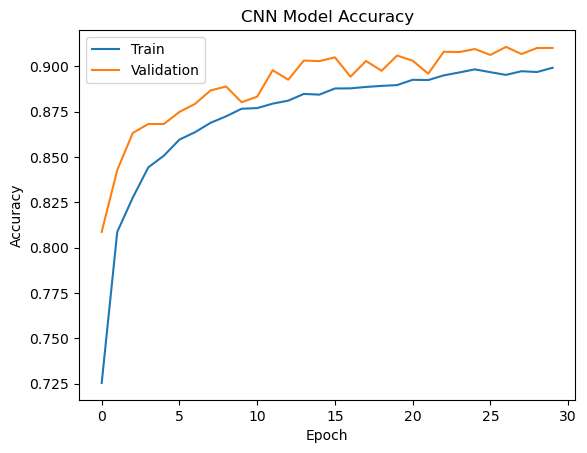

In [14]:
with open("history.pkl", "rb") as f:
    history = pickle.load(f)

# Accuracy plot
plt.figure()
plt.plot(history['accuracy'])
plt.plot(history['val_accuracy'])
plt.title("CNN Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Validation"])
plt.savefig("images\cnn_accuracy.png", dpi=300)
plt.show()
plt.close()

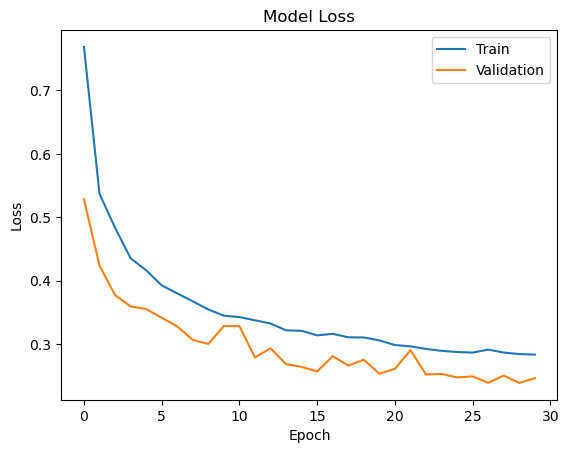

In [8]:
# Loss plot
plt.figure()
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig("images\cnn_loss.png", dpi=300)
plt.show()
plt.close()

# Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step


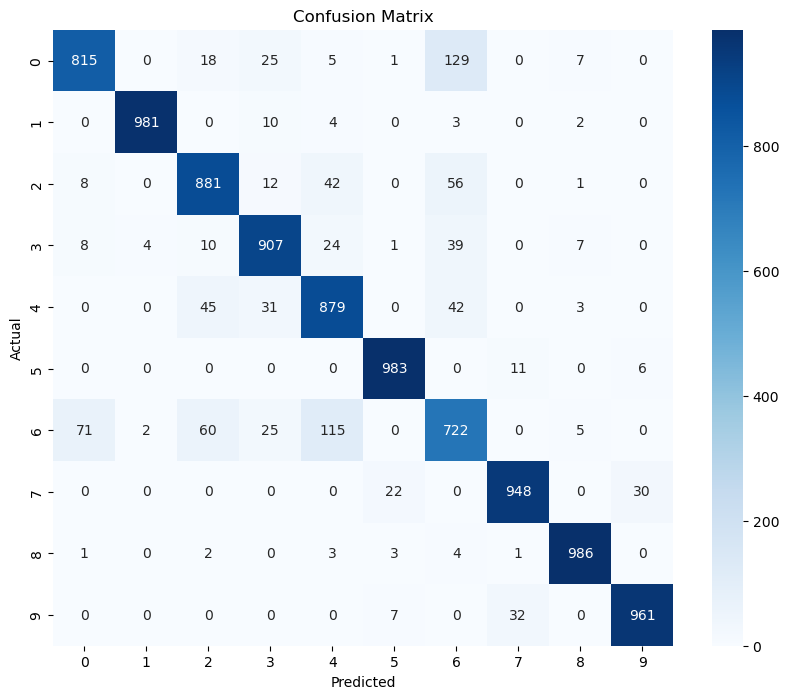

In [9]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.savefig("images\confusion_matrix.png", dpi=300)
plt.show()
plt.close()

# Classification Report

In [10]:
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           0       0.90      0.81      0.86      1000
           1       0.99      0.98      0.99      1000
           2       0.87      0.88      0.87      1000
           3       0.90      0.91      0.90      1000
           4       0.82      0.88      0.85      1000
           5       0.97      0.98      0.97      1000
           6       0.73      0.72      0.72      1000
           7       0.96      0.95      0.95      1000
           8       0.98      0.99      0.98      1000
           9       0.96      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



# Sample Predictions Visualization

In [12]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]

plt.figure(figsize=(12,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"Pred: {class_names[y_pred_classes[i]]}")
    plt.axis('off')
plt.tight_layout()
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle boot"]
plt.savefig("images\sample_prediction.png", dpi=300)
plt.close()
